Diamond Price Prediction
Introduction About the Data :
The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond
carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
cut : Quality of Diamond Cut
color : Color of Diamond
clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
table : A diamond's table is the facet which can be seen when the stone is viewed face up.
x : Diamond X dimension
y : Diamond Y dimension
x : Diamond Z dimension
Target variable:

price: Price of the given Diamond.

In [2]:
import pandas as pd
import matplotlib.pyplot

In [62]:
## Data Ingestions step
df=pd.read_csv('data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0


In [35]:
df.isnull().sum()


id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          1
z          1
price      1
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118950 entries, 0 to 118949
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       118950 non-null  int64  
 1   carat    118950 non-null  float64
 2   cut      118950 non-null  object 
 3   color    118950 non-null  object 
 4   clarity  118950 non-null  object 
 5   depth    118950 non-null  float64
 6   table    118950 non-null  float64
 7   x        118950 non-null  float64
 8   y        118949 non-null  float64
 9   z        118949 non-null  float64
 10  price    118949 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 10.0+ MB


In [37]:
## Lets drop the id column
df=df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0


In [38]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [39]:
df[categorical_columns].describe()

,cut,color,clarity
count,118950,118950,118950
unique,5,7,8
top,Ideal,G,SI1
freq,56942,27140,32738


In [40]:
df['cut'].value_counts()

cut
Ideal        56942
Premium      30508
Very Good    23127
Good          7155
Fair          1218
Name: count, dtype: int64

In [41]:
df['color'].value_counts()

color
G    27140
E    21988
F    21059
H    19049
D    15001
I    10792
J     3921
Name: count, dtype: int64

In [42]:
df['clarity'].value_counts()

clarity
SI1     32738
VS2     29516
VS1     18872
SI2     18638
VVS2     9717
VVS1     6520
IF       2631
I1        318
Name: count, dtype: int64

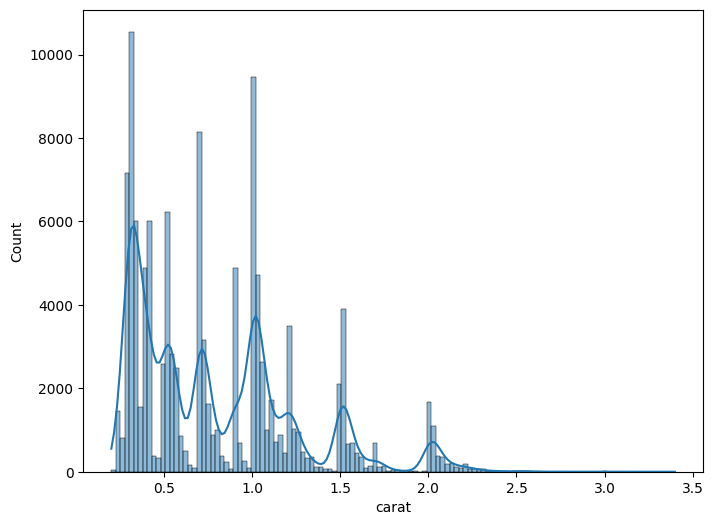

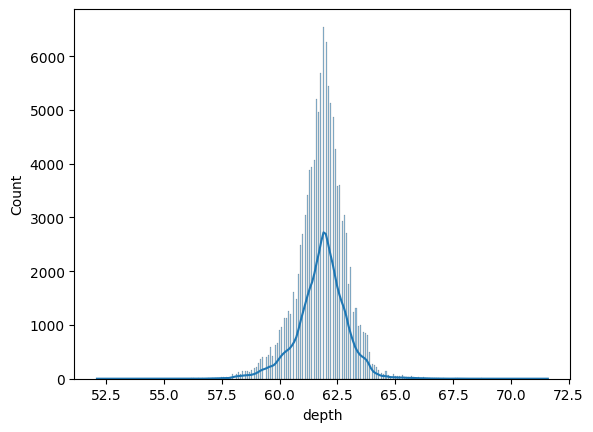

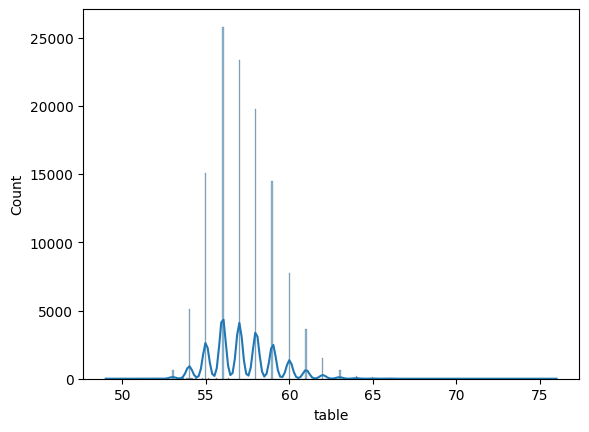

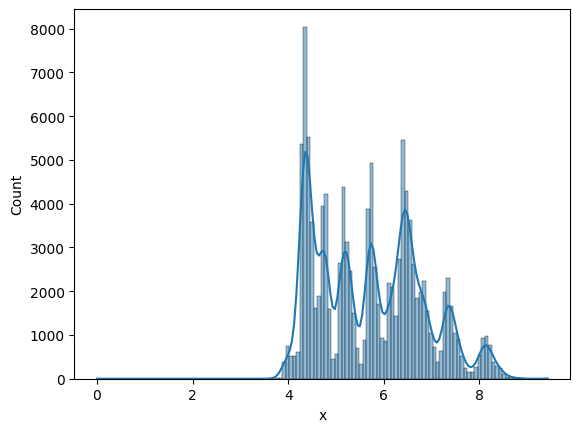

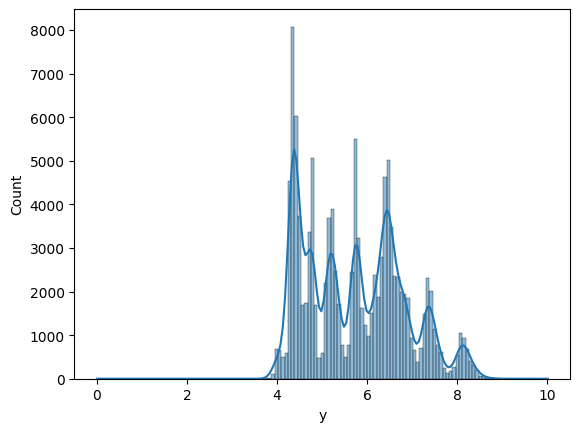

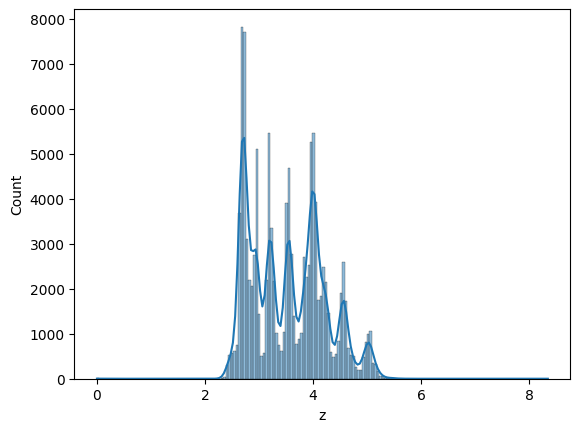

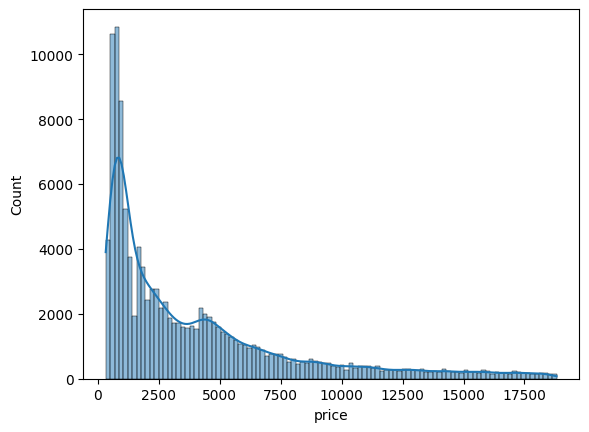

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

<Axes: >

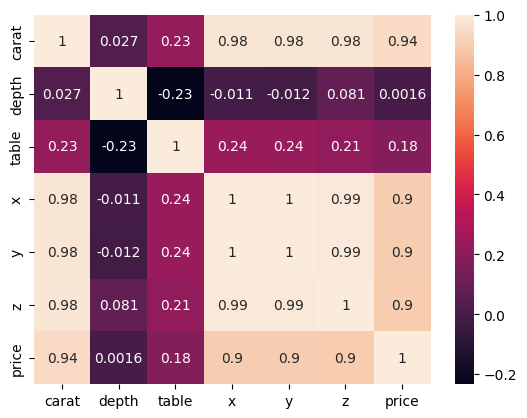

In [44]:
# correlation
import seaborn as sns
sns.heatmap(df[numerical_columns].corr(),annot=True)


In [45]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0


In [46]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [48]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [49]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [58]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}


In [51]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [52]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}


In [63]:
df['cut'] = df['cut'].map(cut_map)
df['color'] = df['color'].map(color_map)
df['clarity'] = df['clarity'].map(clarity_map)

In [57]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,4,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,1,2.03,3,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,2,0.70,5,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,3,0.32,5,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,4,1.70,4,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0


In [64]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619.0
1,1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387.0
2,2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772.0
3,3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666.0
4,4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453.0
